In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

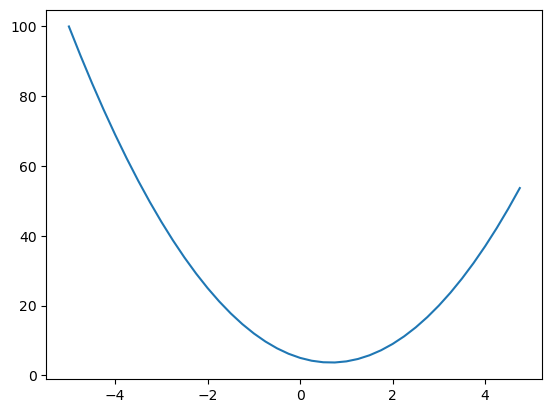

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.00000000001
x = 2/3
(f(x + h) - f(x)) / h

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

In [9]:
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)


d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [10]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
            
        out._backward = _backward
        
        return out
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __radd__(self, other): # other + self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other. data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def __rmul__(self, other): # other * self
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')
                    
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
            
        out._backward = _backward
        
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
            
        out._backward = _backward
        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
            

In [11]:
a = Value(2.0)
b = Value(4.0)
a / b
a - b

Value(data = -2.0)

In [ ]:
!pip install graphviz

In [12]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
f.grad = 4.0
d.grad = -2
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [ ]:
L.grad = 1.0

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

In [15]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd' 
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0 , label = 'a')
    b = Value(-3.0 + h, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd' 
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1) / h)

lol()

-3.9999999999995595


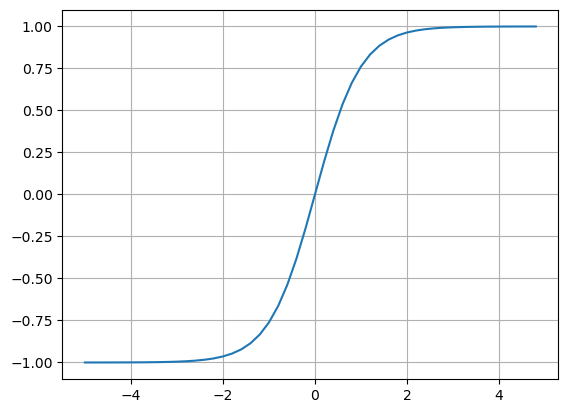

In [16]:
plt.plot((np.arange(-5, 5, 0.2)), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [17]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'output'

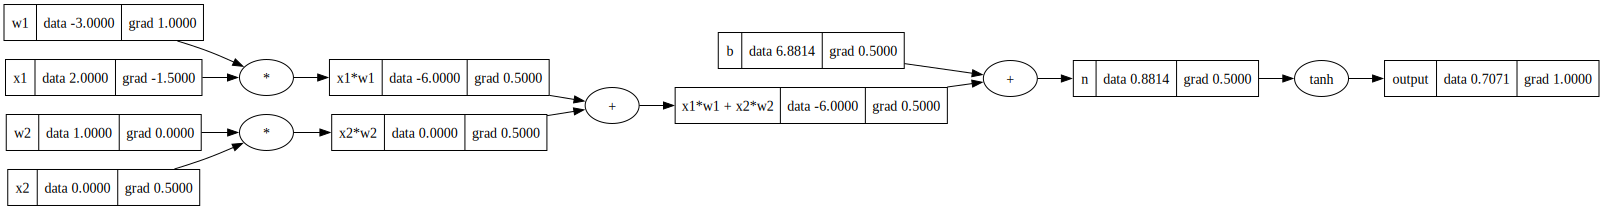

In [20]:
draw_dot(o)

In [19]:
o.backward()

In [21]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 6.881373587019543),
 Value(data = -3.0),
 Value(data = 2.0),
 Value(data = -6.0),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

In [22]:
n._backward()

In [23]:
b._backward()

In [24]:
x1w1x2w2._backward()

In [25]:
x2w2._backward()
x1w1._backward()

In [26]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [27]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [28]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [29]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [30]:
n.grad = 0.5

In [31]:
o.grad = 1.0

In [32]:
1 - o.data**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

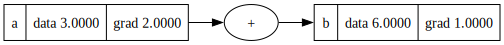

In [33]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

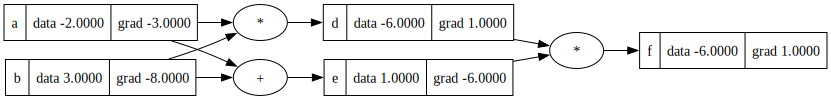

In [34]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [35]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- (breakdown of tanh, yields the same output)
e = (2 * n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'output'
o.backward()

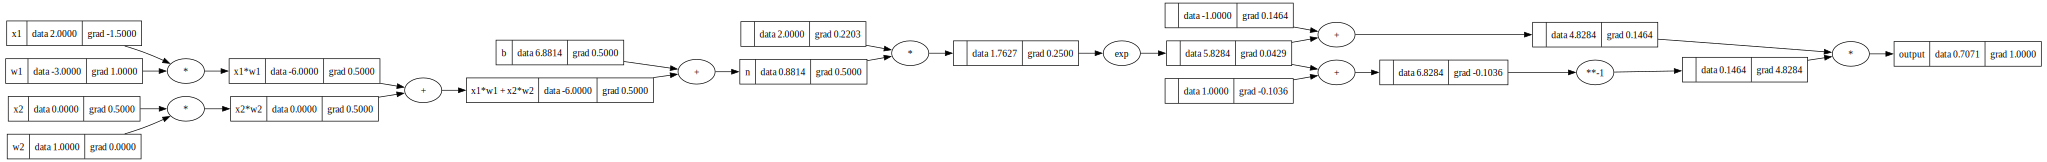

In [36]:
draw_dot(o)

In [ ]:
pip install torch

In [39]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

In [40]:
import random

In [41]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [42]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = -0.9290527731522296)

In [43]:
n.parameters()

[Value(data = -0.32356493884953696),
 Value(data = 0.4277401214026111),
 Value(data = 0.6252509956794357),
 Value(data = 0.013243585249962386),
 Value(data = -0.08237338840917197),
 Value(data = 0.06792862995548288),
 Value(data = -0.7702438476003031),
 Value(data = 0.7038607028520731),
 Value(data = 0.042370491932537835),
 Value(data = 0.9419081339786222),
 Value(data = -0.5945120240352786),
 Value(data = -0.47357460782072947),
 Value(data = -0.8419162977692898),
 Value(data = -0.19528507272834217),
 Value(data = 0.039261308307199094),
 Value(data = -0.9045174788466177),
 Value(data = 0.923202012724291),
 Value(data = -0.4424569012941899),
 Value(data = 0.5313515970615741),
 Value(data = 0.3727728581593046),
 Value(data = 0.8387569680981637),
 Value(data = -0.3046440101969532),
 Value(data = 0.753011745950336),
 Value(data = -0.9570990401432455),
 Value(data = -0.07357246118869543),
 Value(data = -0.5539446297269717),
 Value(data = -0.7075441888641598),
 Value(data = -0.17997409985203

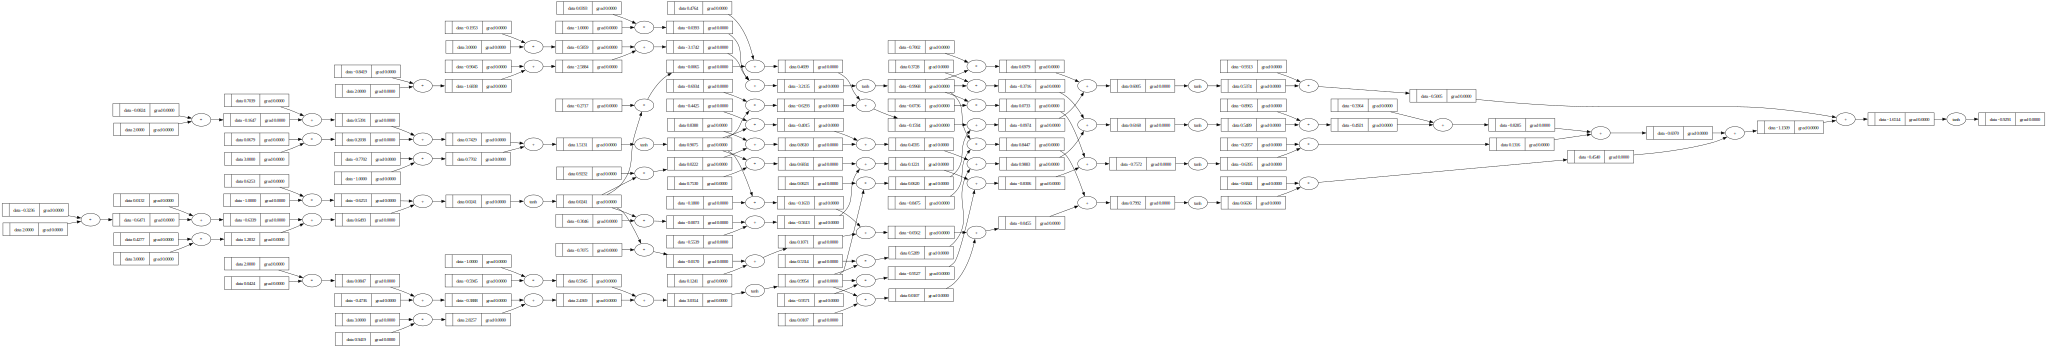

In [44]:
draw_dot(n(x))

In [45]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data = -0.9290527731522296),
 Value(data = -0.865012457520821),
 Value(data = -0.9545625598152296),
 Value(data = -0.8935681193387296)]

In [46]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data = 7.327131021777434)

## forward pass

In [47]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data = 7.327131021777434)

## backward pass

In [48]:
loss.backward()

In [49]:
n.layers[0].neurons[0].w[0].grad

0.3362923503397989

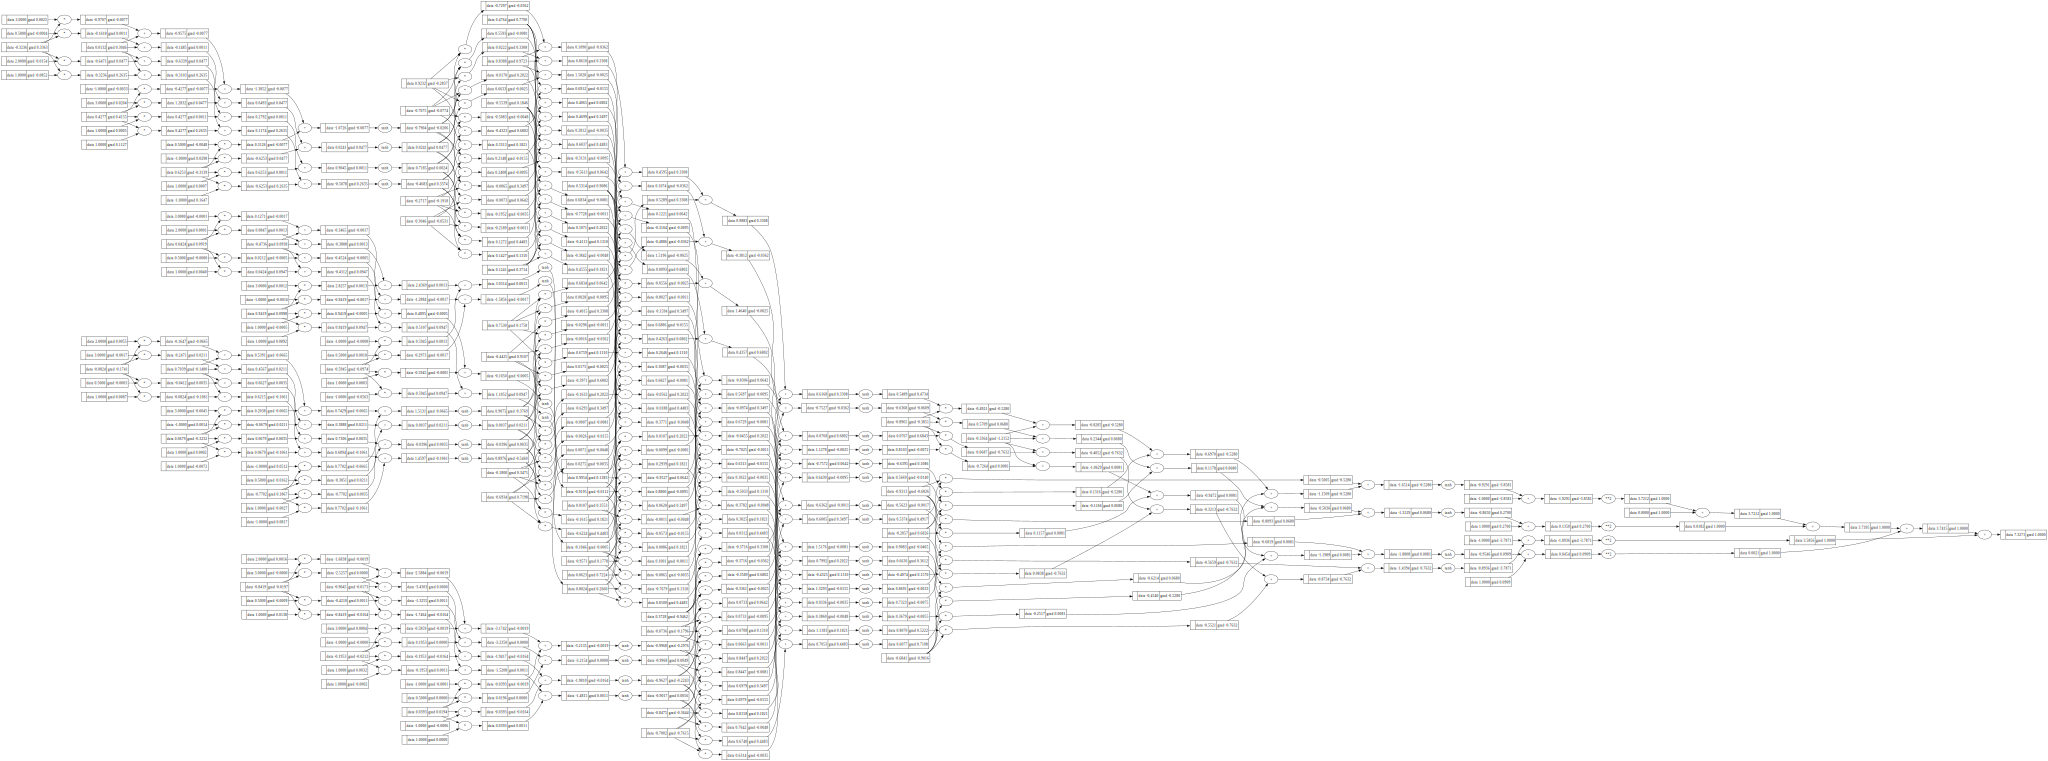

In [50]:
draw_dot(loss)

In [51]:
n.layers[0].neurons[0].w[0].data

-0.32356493884953696

## update 

In [52]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [ ]:
ypred

In [54]:
ypred

[Value(data = -0.9290527731522296),
 Value(data = -0.865012457520821),
 Value(data = -0.9545625598152296),
 Value(data = -0.8935681193387296)]

In [55]:
for k in range(20):
    
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update (gradient-descent)
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, loss.data)

0 7.21258502228394
1 6.07230165029946
2 1.5328545816057493
3 0.6295720639775056
4 0.3194029760074443
5 0.2414926995512203
6 0.19067448149650787
7 0.15546882472324672
8 0.12999988343816998
9 0.11092627978330678
10 0.0962305614316374
11 0.0846359496280597
12 0.07530228813015509
13 0.0676581784167436
14 0.061303830470222226
15 0.055952545655470566
16 0.05139423266441651
17 0.04747196539259223
18 0.0440665155507076
19 0.04108590342447378


In [56]:
ypred

[Value(data = 0.9115092089393358),
 Value(data = -0.8903381530950059),
 Value(data = -0.9056044486776601),
 Value(data = 0.8890088177111858)]